In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [31]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [32]:
df_train.head(3)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied


In [33]:
df_test.head(3)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5


In [34]:
df_train_nan = df_train.loc[:, df_train.isnull().any()]
df_train_nan.isnull().sum() / len(df_train) * 100

Arrival Delay    0.308355
dtype: float64

In [35]:
df_test_nan = df_test.loc[:, df_test.isnull().any()]
df_test_nan.isnull().sum() / len(df_test) * 100

Arrival Delay    0.291675
dtype: float64

<Axes: >

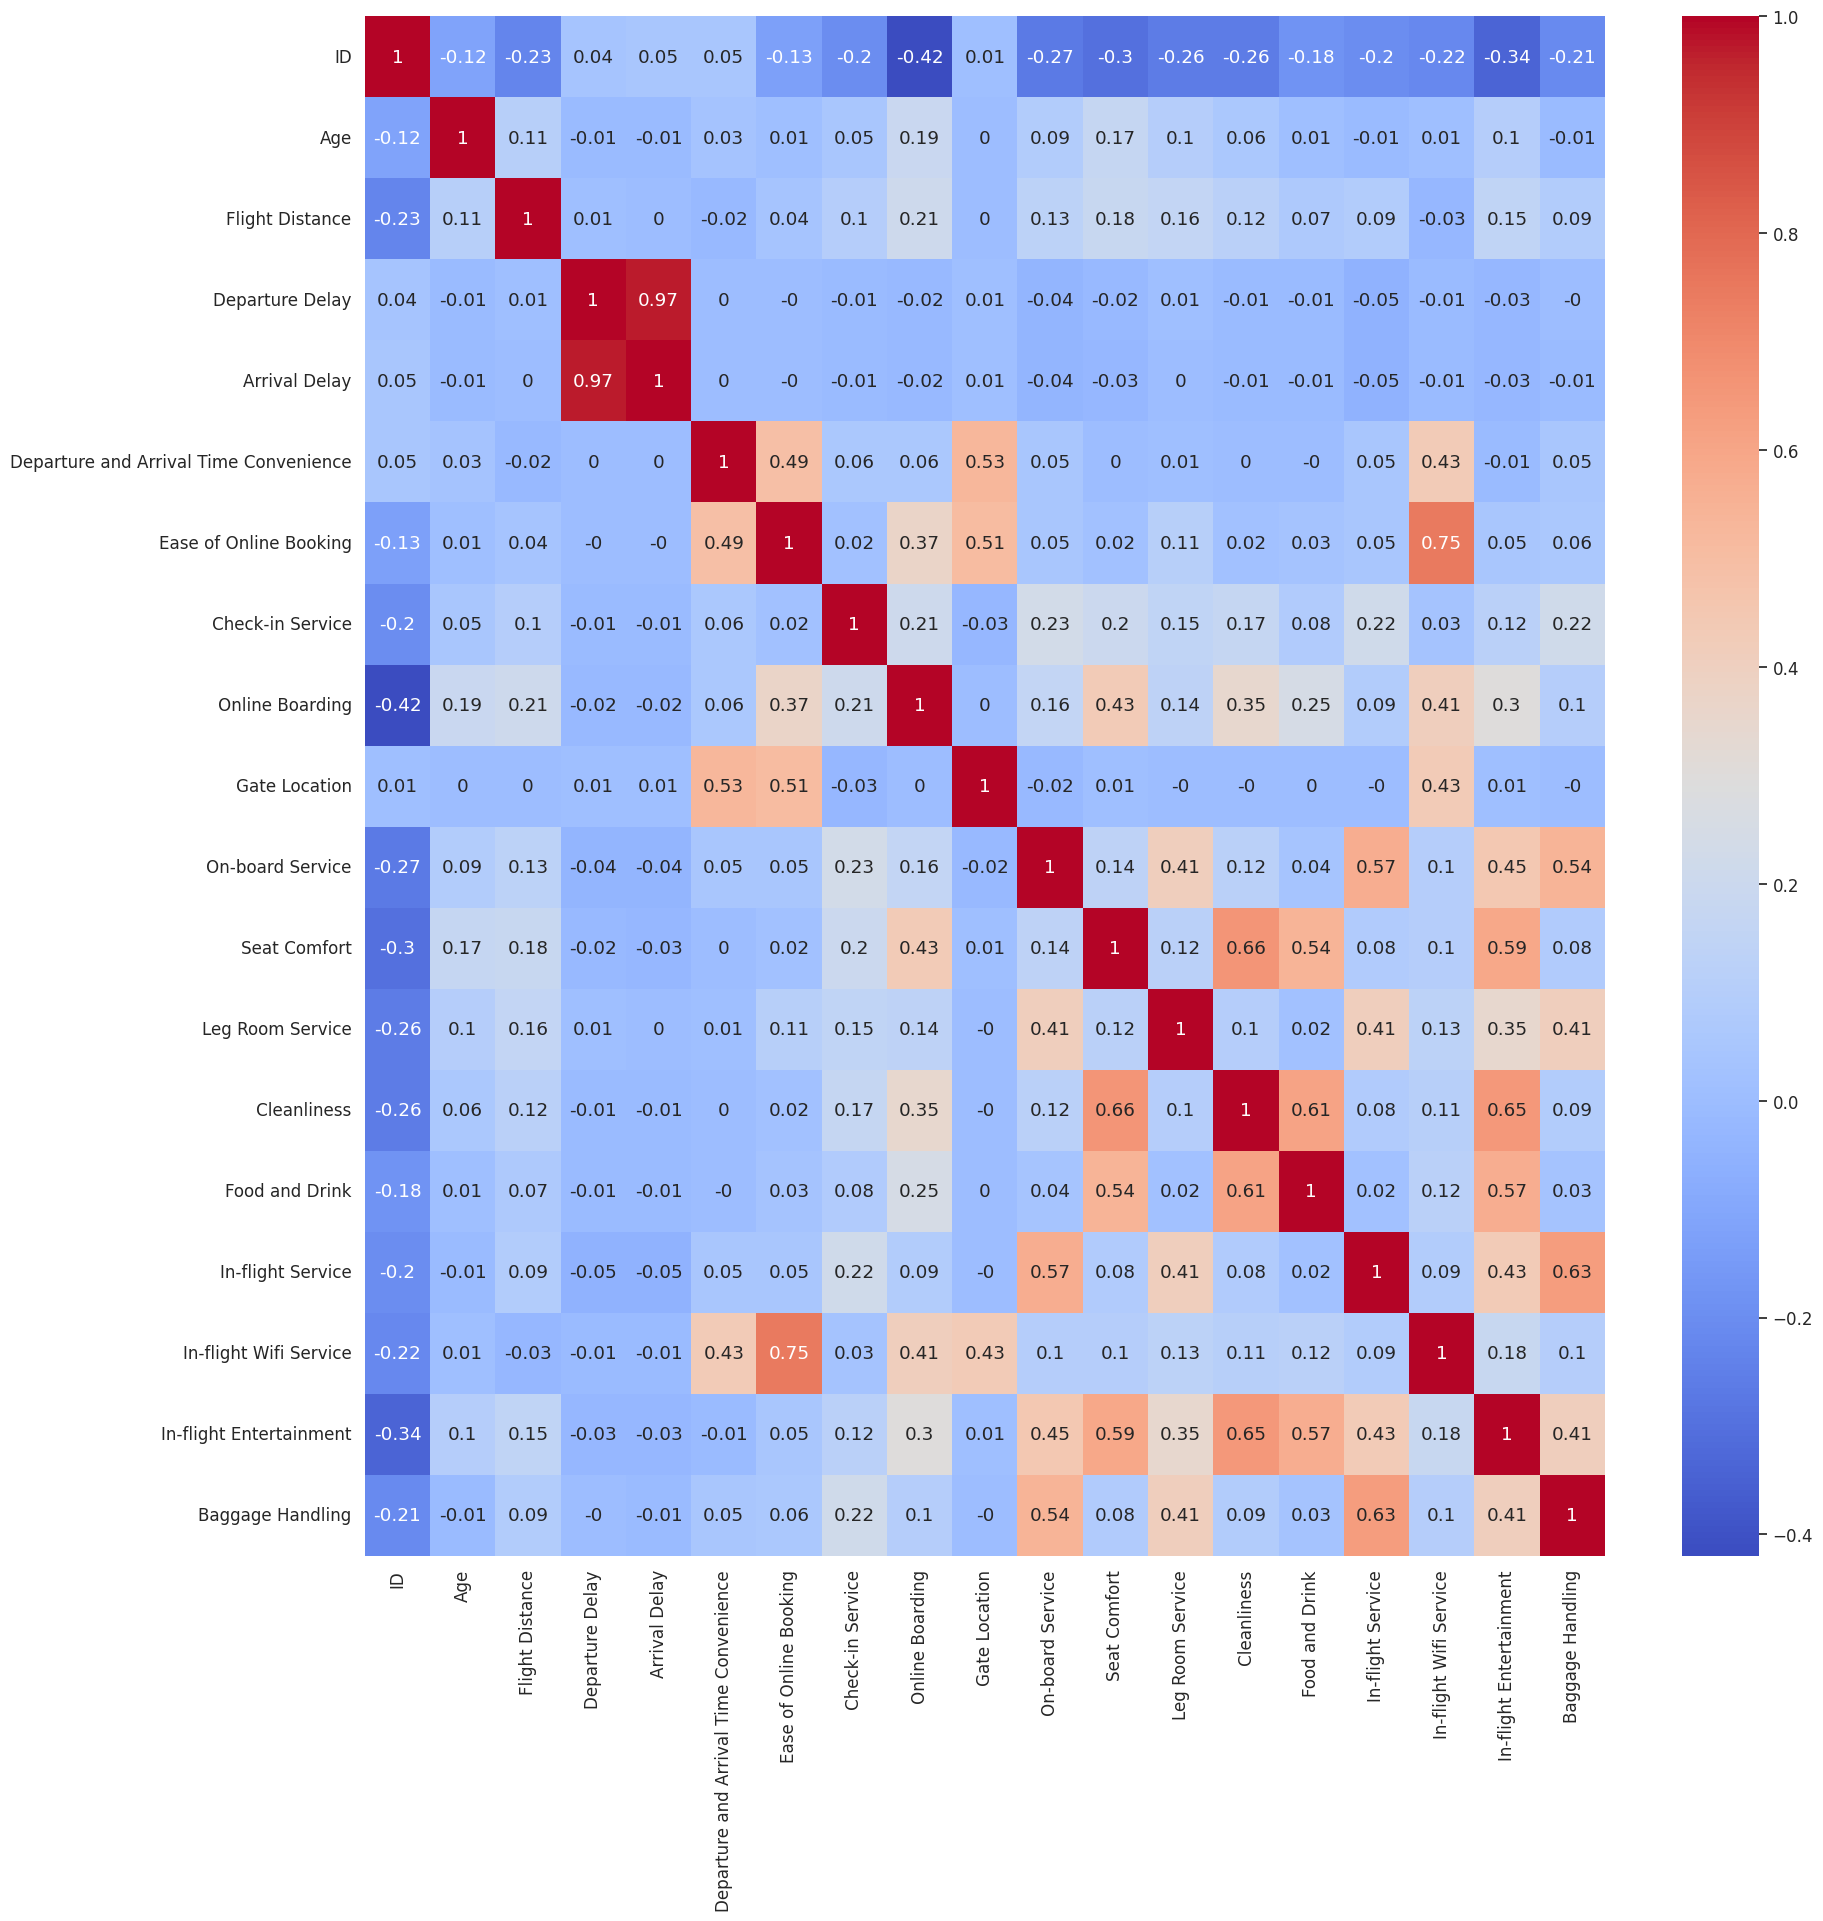

In [36]:
plt.figure(figsize = (20,20))

sns.set(font_scale=1.1)
a = df_train.corr(numeric_only = True)
sns.heatmap(a.round(2), annot=True, cmap='coolwarm')

In [37]:
df_train.drop(columns=["Arrival Delay", "ID"], inplace=True)
test_id = df_test['ID']
df_test.drop(columns=["Arrival Delay", "ID"], inplace=True)

In [38]:
X = df_train.drop('Satisfaction', axis=1).select_dtypes(include=['number'])
encoder = LabelEncoder()
y = encoder.fit_transform(df_train['Satisfaction'])

scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

X_test = df_test.select_dtypes(include=['number'])
X_test_std = scaler.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

X_test_std

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,0.405847,-0.302122,-0.374232,-0.020158,0.106041,-1.941746,-0.365682,-1.510364,0.373198,1.083191,0.389032,1.225562,1.292885,-2.364304,0.094128,1.124183,-1.486482
1,-1.322169,-0.276436,-0.374232,-1.323639,-1.261901,0.473036,-1.844440,0.018352,-0.420890,0.308794,0.389032,0.446105,0.530396,0.218753,-1.305182,0.351368,0.226307
2,-0.077998,-0.324953,0.105412,1.283323,-1.261901,-0.331891,-1.844440,-0.746006,0.373198,1.083191,-0.386249,-0.333352,-0.232093,1.079773,-1.305182,-0.421448,1.082702
3,-1.253048,-0.504754,-0.374232,1.283323,-0.577930,0.473036,-1.105061,0.018352,1.167286,-1.239999,-1.161531,-1.112808,-0.994583,1.079773,-0.605527,-1.194264,1.082702
4,0.544088,0.787146,-0.134410,0.631582,0.790012,-0.331891,0.373697,0.782709,-1.214978,0.308794,-1.161531,-0.333352,-1.757072,-1.503285,-0.605527,-1.194264,-1.486482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,1.650018,0.619713,0.345234,1.283323,1.473983,-1.941746,-1.105061,1.547067,-2.009066,-0.465602,-1.936813,-1.112808,-1.757072,-2.364304,-1.305182,-1.967080,-2.342877
44909,-1.183927,-0.109954,-0.374232,0.631582,0.790012,-1.136818,0.373697,-1.510364,-0.420890,-2.014396,1.164314,-1.112808,-0.994583,0.218753,0.793783,-1.194264,0.226307
44910,0.682329,-0.803470,-0.374232,-0.671898,-0.577930,-0.331891,-1.844440,-0.746006,-1.214978,-2.014396,1.164314,-1.892265,-1.757072,-2.364304,-1.305182,-1.967080,-2.342877
44911,0.613209,-1.016567,-0.267645,-0.671898,-0.577930,-1.136818,-1.105061,0.018352,-2.009066,1.083191,1.164314,-0.333352,-0.232093,-0.642266,-0.605527,-0.421448,0.226307


In [39]:
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [40]:
df_test['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [41]:
l_encoder1 = LabelEncoder()
X_std['Gender'] = l_encoder1.fit_transform(df_train['Gender'])
X_test_std['Gender'] = l_encoder1.transform(df_test['Gender'])

In [42]:
df_train['Customer Type'].unique()

array(['Returning', 'First-time'], dtype=object)

In [43]:
df_test['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [44]:
l_encoder2 = LabelEncoder()
X_std['Customer Type'] = l_encoder2.fit_transform(df_train['Customer Type'])
X_test_std['Customer Type'] = l_encoder2.transform(df_test['Customer Type'])

In [45]:
df_train['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [46]:
df_test['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [47]:
l_encoder3 = LabelEncoder()
X_std['Type of Travel'] = l_encoder3.fit_transform(df_train['Type of Travel'])
X_test_std['Type of Travel'] = l_encoder3.transform(df_test['Type of Travel'])

In [48]:
df_train['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [49]:
df_test['Class'].unique()

array(['Economy', 'Business', 'Economy Plus'], dtype=object)

In [50]:
encoder2 = OneHotEncoder(sparse_output=False)

encoded_class = encoder2.fit_transform(df_train[["Class"]])
X_std = pd.concat([X_std, pd.DataFrame(encoded_class)], axis=1)
class_columns = encoder2.get_feature_names_out(["Class"])
column_names = {0: class_columns[0], 1: class_columns[1], 2: class_columns[2],}
X_std.rename(columns=column_names,  inplace=True)

encoded_class2 = encoder2.fit_transform(df_test[["Class"]])
X_test_std = pd.concat([X_test_std, pd.DataFrame(encoded_class2)], axis=1)
class_columns2 = encoder2.get_feature_names_out(["Class"])
column_names2 = {0: class_columns2[0], 1: class_columns2[1], 2: class_columns2[2],}
X_test_std.rename(columns=column_names2,  inplace=True)

In [51]:
X_std

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender,Customer Type,Type of Travel,Class_Business,Class_Economy,Class_Economy Plus
0,0.405847,0.297214,-0.374232,-1.323639,-1.261901,1.277963,0.373697,-1.510364,1.167286,1.083191,...,1.079773,-1.305182,1.124183,1.082702,1,1,0,1.0,0.0,0.0
1,-0.700083,0.079360,0.425175,1.283323,1.473983,-1.941746,-1.844440,1.547067,-0.420890,-2.014396,...,-0.642266,-1.305182,-1.967080,-0.630088,1,1,0,1.0,0.0,0.0
2,0.682329,-0.838669,-0.374232,1.283323,0.790012,0.473036,0.373697,1.547067,0.373198,1.083191,...,0.218753,1.493438,0.351368,0.226307,0,1,0,1.0,0.0,0.0
3,0.544088,-1.142142,-0.374232,-0.020158,0.106041,-1.941746,-1.105061,0.018352,1.167286,-2.014396,...,1.079773,1.493438,1.124183,1.082702,0,1,0,0.0,1.0,0.0
4,-1.114807,-1.096479,-0.374232,1.283323,-1.945872,0.473036,-2.583819,0.782709,1.167286,-2.014396,...,-0.642266,-2.004837,-1.967080,1.082702,0,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,0.613209,0.013719,-0.374232,-0.020158,0.106041,-0.331891,0.373697,0.018352,0.373198,-0.465602,...,0.218753,0.793783,-0.421448,0.226307,1,0,0,1.0,0.0,0.0
84963,-2.289857,-0.614156,-0.374232,-0.020158,-0.577930,-1.136818,-1.105061,0.018352,-1.214978,-2.014396,...,0.218753,-0.605527,-1.967080,-0.630088,1,1,1,0.0,0.0,1.0
84964,-1.460410,-0.887187,-0.374232,1.283323,0.106041,1.277963,-0.365682,0.018352,1.167286,1.083191,...,1.079773,0.094128,1.124183,1.082702,0,1,1,0.0,1.0,0.0
84965,1.235294,2.044799,-0.134410,-1.323639,-1.261901,-0.331891,0.373697,-1.510364,1.167286,1.083191,...,1.079773,-1.305182,1.124183,1.082702,1,1,0,1.0,0.0,0.0


In [52]:
X_test_std

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender,Customer Type,Type of Travel,Class_Business,Class_Economy,Class_Economy Plus
0,0.405847,-0.302122,-0.374232,-0.020158,0.106041,-1.941746,-0.365682,-1.510364,0.373198,1.083191,...,-2.364304,0.094128,1.124183,-1.486482,0,0,0,0.0,1.0,0.0
1,-1.322169,-0.276436,-0.374232,-1.323639,-1.261901,0.473036,-1.844440,0.018352,-0.420890,0.308794,...,0.218753,-1.305182,0.351368,0.226307,0,0,0,0.0,1.0,0.0
2,-0.077998,-0.324953,0.105412,1.283323,-1.261901,-0.331891,-1.844440,-0.746006,0.373198,1.083191,...,1.079773,-1.305182,-0.421448,1.082702,0,1,1,0.0,1.0,0.0
3,-1.253048,-0.504754,-0.374232,1.283323,-0.577930,0.473036,-1.105061,0.018352,1.167286,-1.239999,...,1.079773,-0.605527,-1.194264,1.082702,1,1,1,1.0,0.0,0.0
4,0.544088,0.787146,-0.134410,0.631582,0.790012,-0.331891,0.373697,0.782709,-1.214978,0.308794,...,-1.503285,-0.605527,-1.194264,-1.486482,1,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,1.650018,0.619713,0.345234,1.283323,1.473983,-1.941746,-1.105061,1.547067,-2.009066,-0.465602,...,-2.364304,-1.305182,-1.967080,-2.342877,1,1,0,1.0,0.0,0.0
44909,-1.183927,-0.109954,-0.374232,0.631582,0.790012,-1.136818,0.373697,-1.510364,-0.420890,-2.014396,...,0.218753,0.793783,-1.194264,0.226307,0,0,0,0.0,1.0,0.0
44910,0.682329,-0.803470,-0.374232,-0.671898,-0.577930,-0.331891,-1.844440,-0.746006,-1.214978,-2.014396,...,-2.364304,-1.305182,-1.967080,-2.342877,1,1,0,0.0,1.0,0.0
44911,0.613209,-1.016567,-0.267645,-0.671898,-0.577930,-1.136818,-1.105061,0.018352,-2.009066,1.083191,...,-0.642266,-0.605527,-0.421448,0.226307,0,0,0,1.0,0.0,0.0


In [55]:
model = LogisticRegression()
model.fit(X_std, y)

LogisticRegression()

In [56]:
model_for = RandomForestClassifier()
model_for.fit(X_std, y)
y_pred_for = model_for.predict(X_test_std)

In [57]:
pred = model.predict(X_test_std)

In [58]:
output = pd.DataFrame({
    'ID': test_id,
    'Satisfaction': y_pred_for
})
output.to_csv('prediction.csv', index=False)